# Importing libraries

In [393]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random
plt.style.use('ggplot')
import matplotlib
from sklearn import datasets


# Defining a perceptron learning algorithm

In [394]:
class Perceptron(object):
    
    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01): # defining the parameters
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.random.rand(no_of_inputs + 1) # +1 for the including the bias 
        
    def predict(self, inputs): # function to predict the Y
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0: # step function
          activation = 1
        else:
          activation = 0            
        return activation

    def train(self, training_inputs, labels):
        #new_weights=[]
        inp=[]
        for _ in range(self.threshold): # _ takes a default value of 100 if threshold is not initiated in the constructer
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)
            inp.append([self.weights[0],self.weights[1],self.weights[2]])
        return inp
        #return new_weights
            #decision=self.decision(self.weights)
            #decision
            #plt.show() 
    

In [397]:
def extended(ax, x, y, **args): # to extend the line

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    x_ext = np.linspace(xlim[0], xlim[1], 100)
    p = np.polyfit(x, y , deg=1)
    y_ext = np.poly1d(p)(x_ext)
    ax.plot(x_ext, y_ext, **args)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return ax

def only_decision(x): # returns the x and y co-ordinates
    b, w1, w2 = x
    x = -b / w1
    y = -b / w2
    d = y
    c = -y / x
    line_x_coords = np.array([0, x])
    line_y_coords = c * line_x_coords + d
    return line_x_coords, line_y_coords


In [427]:
training_inputs = [] #inputs
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

labels = np.array([1, 1, 1, 0]) # expected output

perceptron = Perceptron(2) #two inputs
mm=perceptron.train(training_inputs, labels) #training & backprop


# Comparing inputs, expected output & predicted output

In [428]:

for i in range(len(training_inputs)):
    print(training_inputs[i],labels[i],perceptron.predict(training_inputs[i])) 

[1 1] 1 1
[1 0] 1 1
[0 1] 1 1
[0 0] 0 0


In [421]:
def decision(x): # Plots the decision boundary line 
    b, w1, w2 = x
    x = -b / w1
    y = -b / w2
    d = y
    c = -y / x
    line_x_coords = np.array([0, x])
    line_y_coords = c * line_x_coords + d
    plt.plot(line_x_coords, line_y_coords)
    

# Plotting the decision boundary after each epoch 

<function matplotlib.pyplot.show(close=None, block=None)>

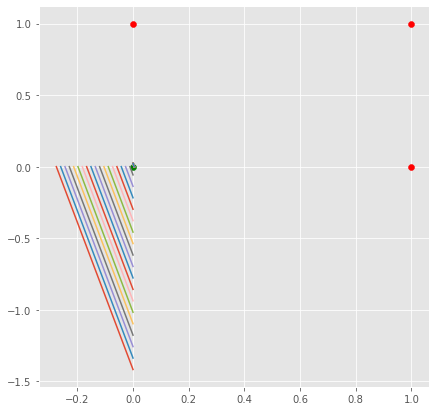

In [430]:
fig_dims = (7, 7)
fig, ax = plt.subplots(figsize=fig_dims)
ax.scatter(0, 0, color="g")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="r")
for i in range(len(mm)):
     decision(mm[i])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

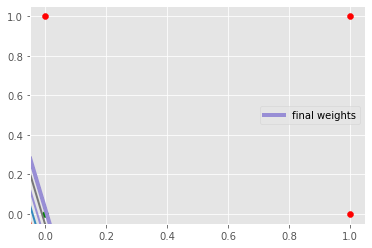

In [429]:
ax = plt.subplot(111)
ax.scatter(0, 0, color="g")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="r")
#for i in range(len(mm)):
 #    decision(mm[i])
for i in range(len(mm)):
    x_short,y_short =only_decision(mm[i])
    ax = extended(ax, x_short, y_short, lw=2)
#ax.plot(x_short, y_short, color="g", lw=4, label="short")
x_short,y_short =only_decision(mm[99])
ax = extended(ax, x_short, y_short, lw=4,label="final weights")
ax.legend()
plt.show

In [434]:
training_inputs = [] #inputs
training_inputs.append(np.array([1, 1]))
training_inputs.append(np.array([1, 0]))
training_inputs.append(np.array([0, 1]))
training_inputs.append(np.array([0, 0]))

labels = np.array([1, 0, 0, 0]) # expected output

perceptron = Perceptron(2) #two inputs
mm=perceptron.train(training_inputs, labels) #training & backprop
for i in range(len(training_inputs)):
    print(training_inputs[i],labels[i],perceptron.predict(training_inputs[i])) 

[1 1] 1 1
[1 0] 0 0
[0 1] 0 0
[0 0] 0 0


<function matplotlib.pyplot.show(close=None, block=None)>

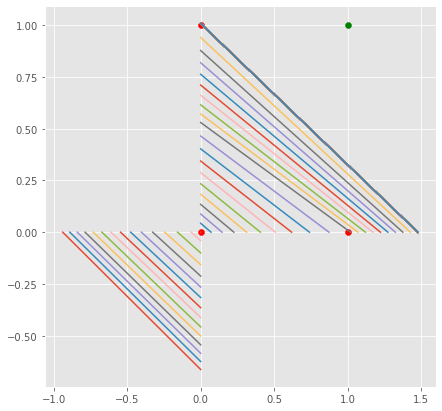

In [435]:
fig_dims = (7, 7)
fig, ax = plt.subplots(figsize=fig_dims)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
for i in range(len(mm)):
     decision(mm[i])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

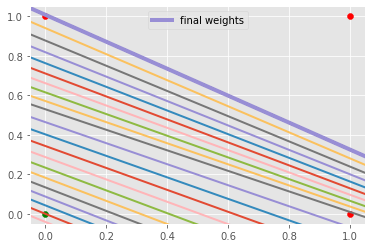

In [436]:
#fig_dims = (7, 7)
#fig, ax = plt.subplots(figsize=fig_dims)
ax = plt.subplot(111)
ax.scatter(0, 0, color="g")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="r")
#for i in range(len(mm)):
 #    decision(mm[i])
for i in range(len(mm)):
    x_short,y_short =only_decision(mm[i])
    ax = extended(ax, x_short, y_short, lw=2)
#ax.plot(x_short, y_short, color="g", lw=4, label="short")
x_short,y_short =only_decision(mm[99])
ax = extended(ax, x_short, y_short, lw=4,label="final weights")
ax.legend()
plt.show


Text(0, 0.5, 'sepal width (cm)')

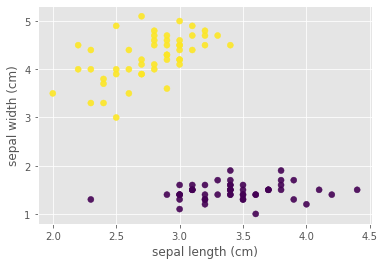

In [437]:
iris = datasets.load_iris()#load data
X = iris.data[:, 1:3]  # we only take two features.
Y = iris.target[0:100] # taking the first 100 rows
len(Y) # make sure we have desired length of data
sepal_length = np.empty(150, dtype=object)#empty array
sepal_width = np.empty(150, dtype=object)
for i in range(len(X)): # converting the 2 dimensional array to 1-d
    sepal_length[i]=X[i][0]
    sepal_width[i]=X[i][1]
input1 = sepal_length[0:100]#taking first 100
input2 = sepal_width[0:100]
original_y=Y
plt.scatter(input1, input2, alpha=0.9,
             c=original_y, cmap='viridis')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")


In [438]:

training_inputs=[]
# sepal_length = np.empty(150, dtype=object)#empty array
# sepal_width = np.empty(150, dtype=object)
for i in range(len(X)): # converting the 2 dimensional array to 1-d
    training_inputs.append(X[i])
training_inputs = training_inputs[0:100]
labels=Y


In [439]:
perceptron = Perceptron(2) #two inputs
mm=perceptron.train(training_inputs, labels) #training & backprop
for i in range(len(training_inputs)):
    print(training_inputs[i],labels[i],perceptron.predict(training_inputs[i])) 

[3.5 1.4] 0 0
[3.  1.4] 0 0
[3.2 1.3] 0 0
[3.1 1.5] 0 0
[3.6 1.4] 0 0
[3.9 1.7] 0 0
[3.4 1.4] 0 0
[3.4 1.5] 0 0
[2.9 1.4] 0 0
[3.1 1.5] 0 0
[3.7 1.5] 0 0
[3.4 1.6] 0 0
[3.  1.4] 0 0
[3.  1.1] 0 0
[4.  1.2] 0 0
[4.4 1.5] 0 0
[3.9 1.3] 0 0
[3.5 1.4] 0 0
[3.8 1.7] 0 0
[3.8 1.5] 0 0
[3.4 1.7] 0 0
[3.7 1.5] 0 0
[3.6 1. ] 0 0
[3.3 1.7] 0 0
[3.4 1.9] 0 0
[3.  1.6] 0 0
[3.4 1.6] 0 0
[3.5 1.5] 0 0
[3.4 1.4] 0 0
[3.2 1.6] 0 0
[3.1 1.6] 0 0
[3.4 1.5] 0 0
[4.1 1.5] 0 0
[4.2 1.4] 0 0
[3.1 1.5] 0 0
[3.2 1.2] 0 0
[3.5 1.3] 0 0
[3.6 1.4] 0 0
[3.  1.3] 0 0
[3.4 1.5] 0 0
[3.5 1.3] 0 0
[2.3 1.3] 0 0
[3.2 1.3] 0 0
[3.5 1.6] 0 0
[3.8 1.9] 0 0
[3.  1.4] 0 0
[3.8 1.6] 0 0
[3.2 1.4] 0 0
[3.7 1.5] 0 0
[3.3 1.4] 0 0
[3.2 4.7] 1 1
[3.2 4.5] 1 1
[3.1 4.9] 1 1
[2.3 4. ] 1 1
[2.8 4.6] 1 1
[2.8 4.5] 1 1
[3.3 4.7] 1 1
[2.4 3.3] 1 1
[2.9 4.6] 1 1
[2.7 3.9] 1 1
[2.  3.5] 1 1
[3.  4.2] 1 1
[2.2 4. ] 1 1
[2.9 4.7] 1 1
[2.9 3.6] 1 1
[3.1 4.4] 1 1
[3.  4.5] 1 1
[2.7 4.1] 1 1
[2.2 4.5] 1 1
[2.5 3.9] 1 1
[3.2 4.8] 1 1
[2.8 4

<function matplotlib.pyplot.show(close=None, block=None)>

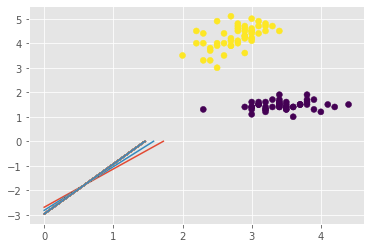

In [440]:
ax = plt.subplot(111)
ax.scatter(input1, input2, c =Y)

for i in range(len(mm)):
     decision(mm[i])
plt.show


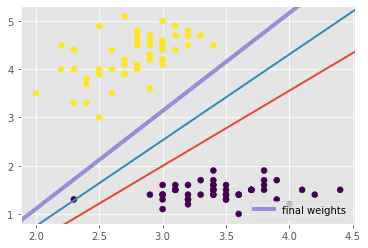

In [441]:
ax = plt.subplot(111)
ax.scatter(input1, input2, c =Y)
for i in range(len(mm)):
    x_short,y_short =only_decision(mm[i])
    ax = extended(ax, x_short, y_short, lw=2)
#ax.plot(x_short, y_short, color="g", lw=4, label="short")
x_short,y_short =only_decision(mm[99])
ax = extended(ax, x_short, y_short, lw=4,label="final weights")
ax.legend()
plt.show()